# Using Time Series Data from Open Source Community

There are various open source univariate datasets. To name a few:
 - [ Kaggle Datasets](https://www.kaggle.com/datasets)
 - [data.world](https://data.world/datasets/time-series) with 49 time series datasets
 - [time series data library](https://pkg.yangzhuoranyang.com/tsdl/)
  Below are some sample csv datasets from that library:
   - [shampoo dataset](data/shampoo.csv) - monthly number of sales of shampoo over a 3 year period
   - [daily min temperature dataset](data/daily-min-temperature.csv) -  minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia
   - [monthly sunspots dataset](data/monthly-sunspots.csv) - monthly count of the number of observed sunspots for just over 230 years (1749-1983).
  
There are various open source univariate datasets. To name a few:
 - [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)
  - [EEG Eye State Data Set](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State) - EEG data for an individual and whether their eyes were open or closed
 
There are also python packages like `sktime` that come with their own datasets

## 1. Example with Tesla Stock Index
Using the [Kaggle dataset](https://www.kaggle.com/timoboz/tesla-stock-data-from-2010-to-2020?select=TSLA.csv)

Sample:
```
Date,Open,High,Low,Close,Adj Close,Volume
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
...
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the CSV Timeseries
df_tsla = pd.read_csv('data/TSLA.csv', index_col='Date', parse_dates=['Date'])
df_tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
# Check for any missing value. If there is any, fill in with the last observed value
df_tsla.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
# Fill in missing values 
#df_tsla = df_tsla.fillna(method='ffill')
#df_tsla.head()

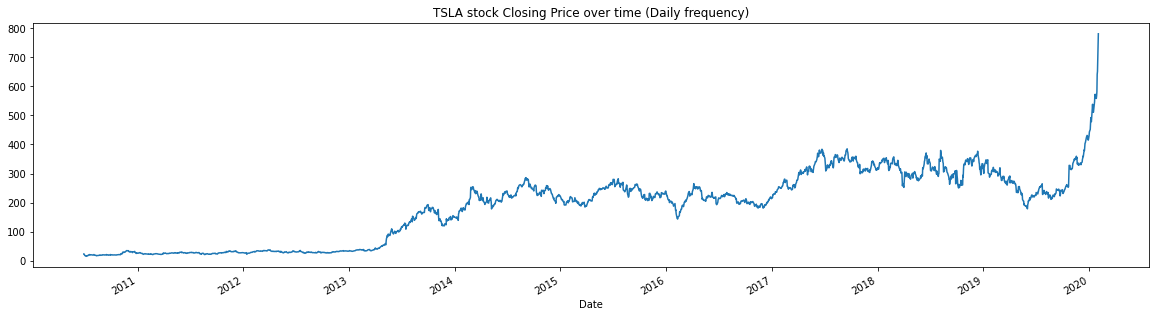

In [5]:
# Visualize the dataset - Daily
fig, ax = plt.subplots(figsize=(20,5), edgecolor='k')
df_tsla['Close'].plot()
plt.title('TSLA stock Closing Price over time (Daily frequency)')
plt.show()

In [6]:
# Visualize the dataset - Monthly
#df_tsla['Close'].asfreq('M').plot()
#plt.title('TSLA stock over time (Monthly frequency)')
#plt.show()

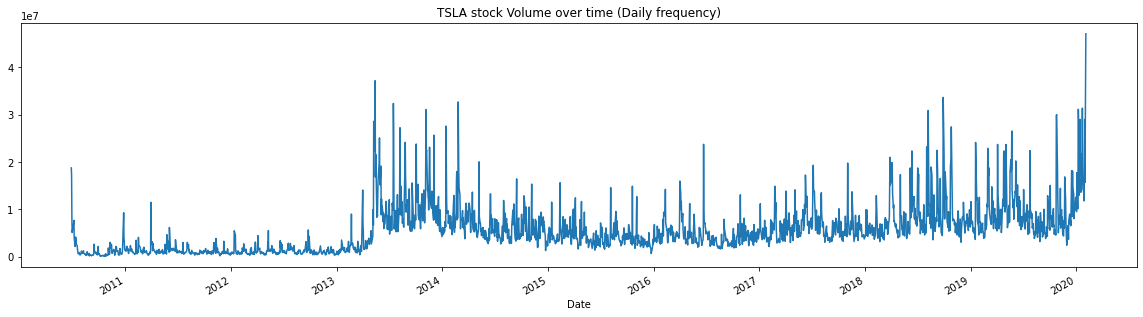

In [7]:
# Visualize the dataset - Daily
fig, ax = plt.subplots(figsize=(20,5), edgecolor='k')
df_tsla['Volume'].plot()
plt.title('TSLA stock Volume over time (Daily frequency)')
plt.show()

## 2. Example with Shampoo
This dataset describes the monthly number of sales of shampoo over a 3 year period.
The units are a sales count and there are 36 observations. The original dataset is credited to Makridakis, Wheelwright and Hyndman (1998).

Sample:
```
"Month","Sales"
"1-01",266.0
"1-02",145.9
"1-03",183.1
"1-04",119.3# Import the CSV Timeseries
df_tsla = pd.read_csv('data/TSLA.csv', index_col='Date', parse_dates=['Date'])
df_tsla.head()
...
```

In [8]:
# Import the CSV Timeseries
df_shampoo = pd.read_csv('data/shampoo.csv', index_col='Month', parse_dates=['Month'])
df_shampoo.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


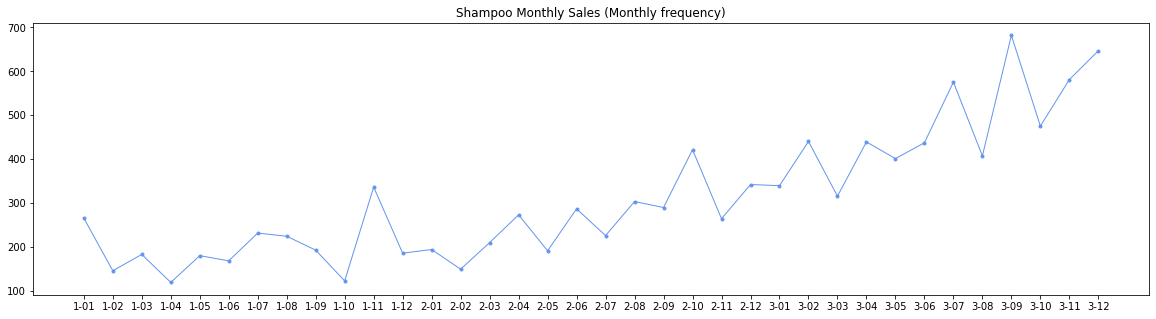

In [9]:
# Visualize the dataset
fig, ax = plt.subplots(figsize=(20,5), edgecolor='k')
#df_shampoo['Sales'].plot()
plt.plot(df_shampoo.index, df_shampoo.Sales, marker='o', markersize=3, color='cornflowerblue', linewidth=1, label="Time Serie")
plt.title('Shampoo Monthly Sales (Monthly frequency)')
plt.show()

## 3. Example with Daily Temperatures
This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.
The units are in degrees Celsius and there are 3650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

Sample:
```
"Date","Temp"
"1981-01-01",20.7
"1981-01-02",17.9
"1981-01-03",18.8
"1981-01-04",14.6
```

In [10]:
# Import the CSV Timeseries
df_temp = pd.read_csv('data/daily-min-temperature.csv', index_col='Date', parse_dates=['Date'])
df_temp.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


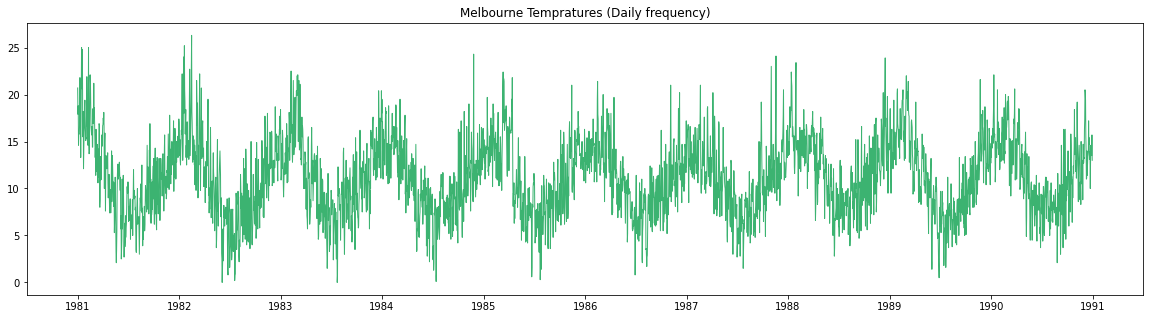

In [11]:
# Visualize the dataset
fig, ax = plt.subplots(figsize=(20,5), edgecolor='k')
plt.plot(df_temp.index, df_temp.Temp, color='mediumseagreen', linewidth=1, label="Time Serie")
plt.title('Melbourne Tempratures (Daily frequency)')
plt.show()

## 4. Example with Exchange rates
[Exchange rates](https://www.kaggle.com/federalreserve/exchange-rates)

## 5. Example with sktime
[skitime](https://github.com/alan-turing-institute/sktime) offers time series algorithms and scikit-learn compatible tools to build, tune and validate time series models for multiple learning problems.

This [notebook](https://github.com/alan-turing-institute/sktime/blob/master/examples/loading_data.ipynb) also provides more info about loading data with sktime, that loads data as nested pandas DataFrame objects


### 5.1 Example with sktime - Airline
Use the Box-Jenkins univariate airline data set, which shows the number of international airline passengers per month from 1949 - 1960

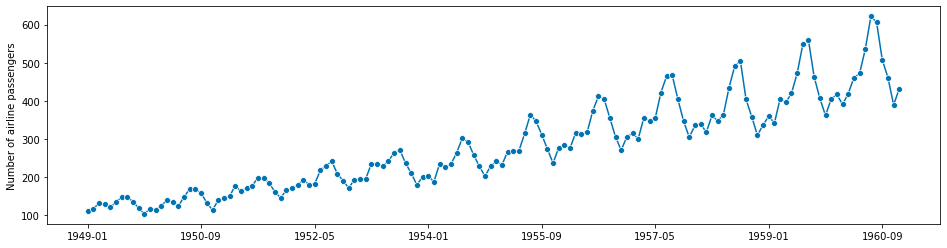

In [16]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
y = load_airline()
plot_series(y);


108 36


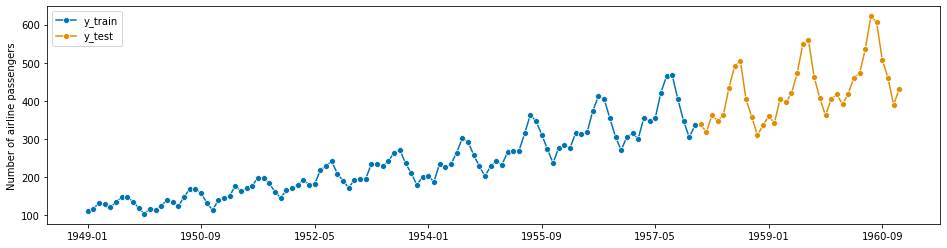

In [17]:
# Below would be what we wuld do if we were trying to forecast
y_train, y_test = temporal_train_test_split(y, test_size=36)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

More info about forecasting can be found in this [notebook](https://github.com/alan-turing-institute/sktime/blob/master/examples/01_forecasting.ipynb)

### 6. Resources:
 - [time-series-datasets-for-machine-learning](https://machinelearningmastery.com/time-series-datasets-for-machine-learning/)